##Dia 3

####O objetivo é entender se a quantidade de empréstimos está diminuindo, aumentando ou permanecendo igual ao decorrer dos últimos anos.
####Para isso, vamos ver qual é a quantidade total de exemplares emprestados por cada ano e plote um gráfico de linhas. E fazer uma análise em relação à visualização gerada.

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

In [58]:
emprestimos_completo.head()

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU_geral
0,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas
1,709685,L167050,NaN,2010/01/04 07:44:10.750000000,2010/01/12 07:34:13.934000000,2008023265.0,ALUNO DE GRADUAÇÃO,70865,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,647,Ciências aplicadas
2,709686,2006017618,2010/01/26 08:07:01.738000000,2010/01/04 08:08:44.081000000,2010/02/25 07:36:25.800000000,2008112114.0,ALUNO DE PÓS-GRADUAÇÃO,195347,Acervo Circulante,Biblioteca Setorial Prof. Rodolfo Helinski - E...,REGULAR,640,Ciências aplicadas
3,709687,L184117,2010/01/18 11:07:46.470000000,2010/01/04 08:24:21.284000000,2010/02/03 08:58:45.692000000,200721119.0,ALUNO DE GRADUAÇÃO,131639,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,609,Ciências aplicadas
4,709684,L095049,NaN,2010/01/04 07:44:10.721000000,2010/01/05 16:26:12.662000000,2008023265.0,ALUNO DE GRADUAÇÃO,13259,Acervo Circulante,Biblioteca Central Zila Mamede,REGULAR,630,Ciências aplicadas


###Verificando a relação entre empréstimo e empréstimo de exemplar

In [59]:
emprestimos_completo['id_emprestimo'].value_counts()

,count
id_emprestimo,
709705,7
709704,7
1752337,3
2422542,3
2014596,3
...,...
1523988,1
1523987,1
1523986,1


In [60]:
emprestimos_completo.loc[emprestimos_completo['id_emprestimo']==2560028]

,id_emprestimo,codigo_barras,data_renovacao,data_emprestimo,data_devolucao,matricula_ou_siape,tipo_vinculo_usuario,id_exemplar,colecao,biblioteca,status_material,localizacao,CDU_geral


In [61]:
##Quantos emprestimos foram realizados ao total?
emprestimos = len(emprestimos_completo['id_emprestimo'].drop_duplicates())
emprestimos

2068724

In [62]:
##Quantos exemplares foram emprestados ao total ?
exemplares = len(emprestimos_completo)
exemplares

2072558

In [63]:
##Quantidade de exemplares emprestadas por ano
emprestimos_data = pd.DataFrame(emprestimos_completo['data_emprestimo'].value_counts()).reset_index()
emprestimos_data.columns = ['data','quantidade']
emprestimos_data['data'] = pd.to_datetime(emprestimos_data['data'])
emprestimos_data

,data,quantidade
0,2010-01-04 09:58:46.549,7
1,2010-01-04 09:58:46.522,7
2,2017-11-06 19:52:32.782,3
3,2016-04-20 21:07:44.036,3
4,2018-11-22 18:28:01.619,3
...,...,...
2068686,2013-06-06 17:41:22.688,1
2068687,2013-06-06 17:40:06.074,1
2068688,2013-06-06 17:39:44.209,1
2068689,2013-06-06 17:34:42.071,1


In [64]:
# Extrair o ano da coluna 'data'
emprestimos_data['ano'] = emprestimos_data['data'].dt.year

# Agrupar por ano e somar as quantidades
emprestimos_por_ano = emprestimos_data.groupby('ano')['quantidade'].sum()

# Verificação
print("Quantidade total de exemplares emprestados por ano:")
print(emprestimos_por_ano)

Quantidade total de exemplares emprestados por ano:
ano
2010    161412
2011    196390
2012    221365
2013    234749
2014    219189
2015    213582
2016    215918
2017    218462
2018    194080
2019    171801
2020     25610
Name: quantidade, dtype: int64


##Configurando o tema dos gráficos

In [65]:
sns.set_theme(context='notebook',
              style='darkgrid',
              palette='deep',
              font_scale=1.3,
              rc={"figure.figsize":(15,8)})

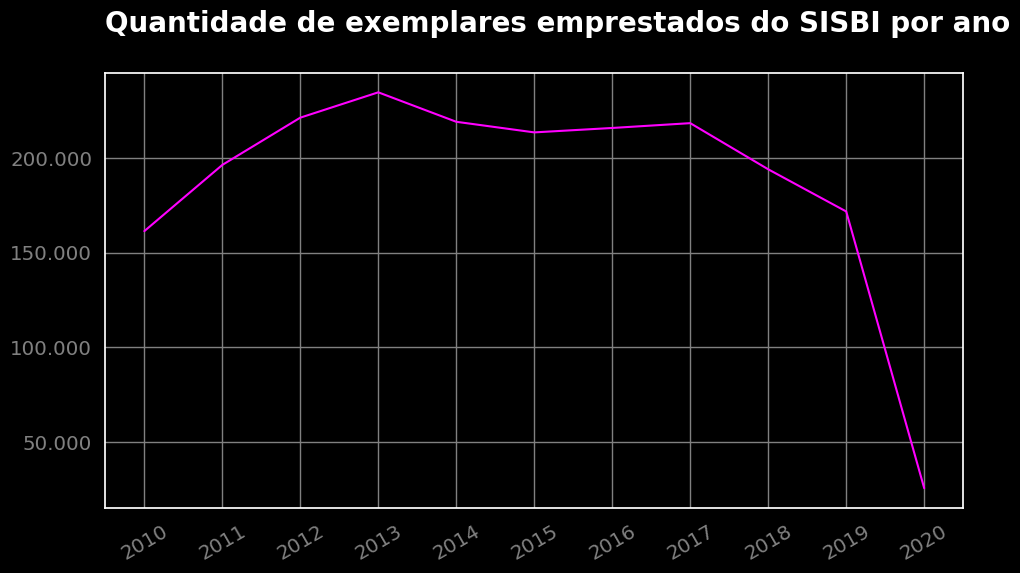

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Converter a Series para DataFrame
df_plot = emprestimos_por_ano.reset_index()
df_plot.columns = ['ano', 'quantidade']

# Criar o gráfico
plt.style.use('dark_background')
plt.figure(figsize=(10,6))
ax = sns.lineplot(data=df_plot, x='ano', y='quantidade', color='#FF00FF')

# Ajustes visuais
ax.set(xlabel=None, ylabel=None)
ax.set_xticks(df_plot['ano'].unique())
ax.tick_params(axis='x', rotation=30, colors='gray')
ax.tick_params(axis='y', colors='gray')
ax.grid(color='gray')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))
ax.title.set_color('gray')
ax.set_title('Quantidade de exemplares emprestados do SISBI por ano\n', size=20, loc='left', weight='bold')

plt.tight_layout()
plt.show()

Pode-ser perceber que desde 2013 os números de exemplares emprestados diminuindo, com uma queda bem grande em 2019.

O ano de 2020 não pode ser avaliado igual, devido ao período da quantidade de dados.

É importante a direção da biblioteca investigar o que está ocorrendo desde 2013 com os procedimentos realizados. Alguns questionamentos importantes que deve-se levar a direção, para que seja aprofundada em outra análise:

* O número de alunos da universidade vem diminuindo?
* Como está a pesquisa de satisfação dos usuários da biblioteca?
* O acervo está atualizado?
* Quais são as estratégias de marketing que a biblioteca está realizando?
* O que ocorreu de diferente em 2017 em relação a 2016 e 2015 para que o número tenha se elevado?
* E em 2019?

##Quantos foram por cada mês?

In [67]:
# Extrair o mês da coluna 'data'
emprestimos_data['mês'] = emprestimos_data['data'].dt.month

# Agrupar por mês e somar as quantidades
emprestimos_por_mes = emprestimos_data.groupby('mês')['quantidade'].sum()

# Verificação
print("Quantidade total de exemplares emprestados por mês:")
print(emprestimos_por_mes)

Quantidade total de exemplares emprestados por mês:
mês
1      67542
2     210200
3     252185
4     208725
5     202530
6     138131
7     123790
8     232793
9     208234
10    188410
11    164222
12     75796
Name: quantidade, dtype: int64


###Trocando os números pelos nomes dos meses

In [68]:
dicionario_meses = {1:'Jan',2:'Fev',3:'Mar',4:'Abr',
                    5:'Mai',6:'Jun',7:'Jul',8:'Ago',
                    9:'Set',10:'Out',11:'Nov',12:'Dez'}

In [69]:
emprestimos_por_mes.index = emprestimos_por_mes.index.map(dicionario_meses)

In [70]:
emprestimos_por_mes

,quantidade
mês,
Jan,67542
Fev,210200
Mar,252185
Abr,208725
Mai,202530
Jun,138131
Jul,123790
Ago,232793
Set,208234


In [71]:
# Converter para datetime se necessário
emprestimos_completo['data_emprestimo'] = pd.to_datetime(emprestimos_completo['data_emprestimo'], errors='coerce')

# Criar coluna com nome do mês (abreviado) e número do mês para ordenação
emprestimos_completo['mes_num'] = emprestimos_completo['data_emprestimo'].dt.month
emprestimos_completo['mes_nome'] = emprestimos_completo['data_emprestimo'].dt.strftime('%b')  # Jan, Fev, etc.

# Agrupar e somar a quantidade de empréstimos por mês (todos os anos somados)
emprestimos_por_mes = emprestimos_completo.groupby(['mes_num', 'mes_nome']).size().reset_index(name='quantidade')

# Ordenar corretamente os meses
emprestimos_por_mes = emprestimos_por_mes.sort_values('mes_num')

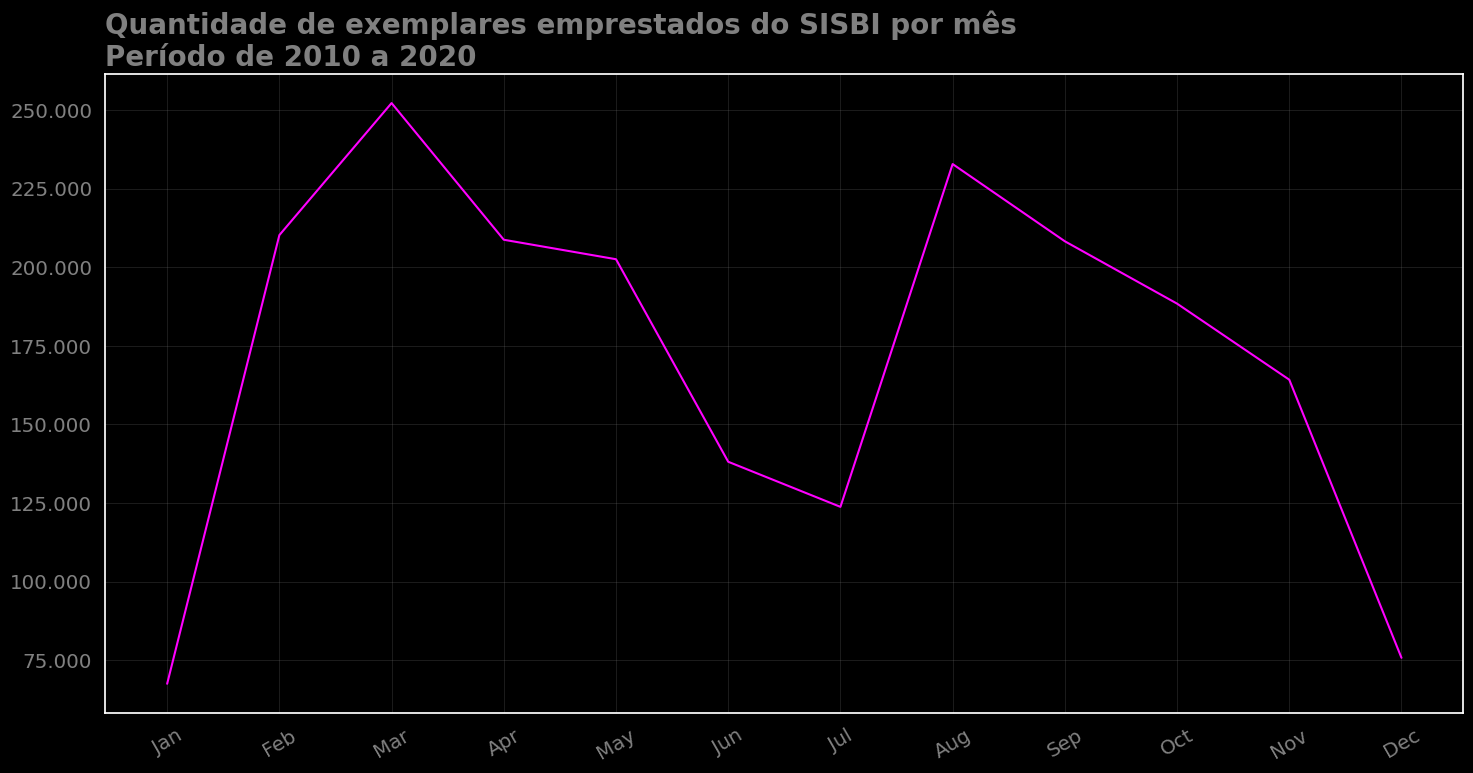

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Estilo escuro
plt.style.use('dark_background')

# Gráfico com linha rosa choque
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=emprestimos_por_mes, x='mes_nome', y='quantidade', color='#FF00FF')

# Aparência
ax.set(xlabel=None, ylabel=None)
ax.tick_params(axis='x', colors='gray', labelrotation=30)
ax.tick_params(axis='y', colors='gray')
ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))

# Título e legenda
ax.set_title("Quantidade de exemplares emprestados do SISBI por mês\nPeríodo de 2010 a 2020",
             size=20, loc='left', weight='bold', color='gray')

plt.tight_layout()
plt.show()

Pode-se visualizar que os meses com maiores números de exemplares emprestados foram em março e agosto.

Por ser uma biblioteca universitária meses de férias como janeiro, julho e dezembro são os menores números.

O que não é nada de novo, entretanto caso todos os colaboradores saírem de férias durante esse período não conseguiríamos manter todo o funcionamento da biblioteca.

Principalmente com atividades de inventário que podem ocorrer anualmente ou de dois em dois anos e o melhor período seria de dezembro a janeiro.

Então meses como maio, junho, outubro e novembro podem ser uma opção a ser considerada pela direção da biblioteca.

Nota-se também a grande queda no mês de junho. Cabe aqui um alerta para se investigar mais, o que está ocorrendo e desenvolver estratégias e ações de marketing da biblioteca para que se aumente o número de exemplares emprestados.

Como por exemplo: uma ação para que sejam realizados empréstimos de livros para a leitura nas férias de julho.

###Qual é a quantidade de empréstimos por hora ao longo do dia?

In [73]:
emprestimos_data.data

,data
0,2010-01-04 09:58:46.549
1,2010-01-04 09:58:46.522
2,2017-11-06 19:52:32.782
3,2016-04-20 21:07:44.036
4,2018-11-22 18:28:01.619
...,...
2068686,2013-06-06 17:41:22.688
2068687,2013-06-06 17:40:06.074
2068688,2013-06-06 17:39:44.209
2068689,2013-06-06 17:34:42.071


In [74]:
# Agrupar e contar a quantidade de empréstimos por hora do dia
emprestimos_por_hora = emprestimos_data.groupby(emprestimos_data['data'].dt.hour).size()

# Organizar em DataFrame
emprestimos_por_hora.index.name = 'hora'
emprestimos_por_hora.name = 'quantidade'
emprestimos_por_hora = emprestimos_por_hora.reset_index()

# Ver resultado
emprestimos_por_hora

,hora,quantidade
0,0,17
1,6,14
2,7,18735
3,8,103226
4,9,131032
5,10,185457
6,11,179713
7,12,148459
8,13,126756
9,14,150571


In [75]:
emprestimos_por_hora = emprestimos_por_hora.sort_values(ascending=True,by='quantidade')

In [76]:
emprestimos_por_hora.index.name = 'hora'

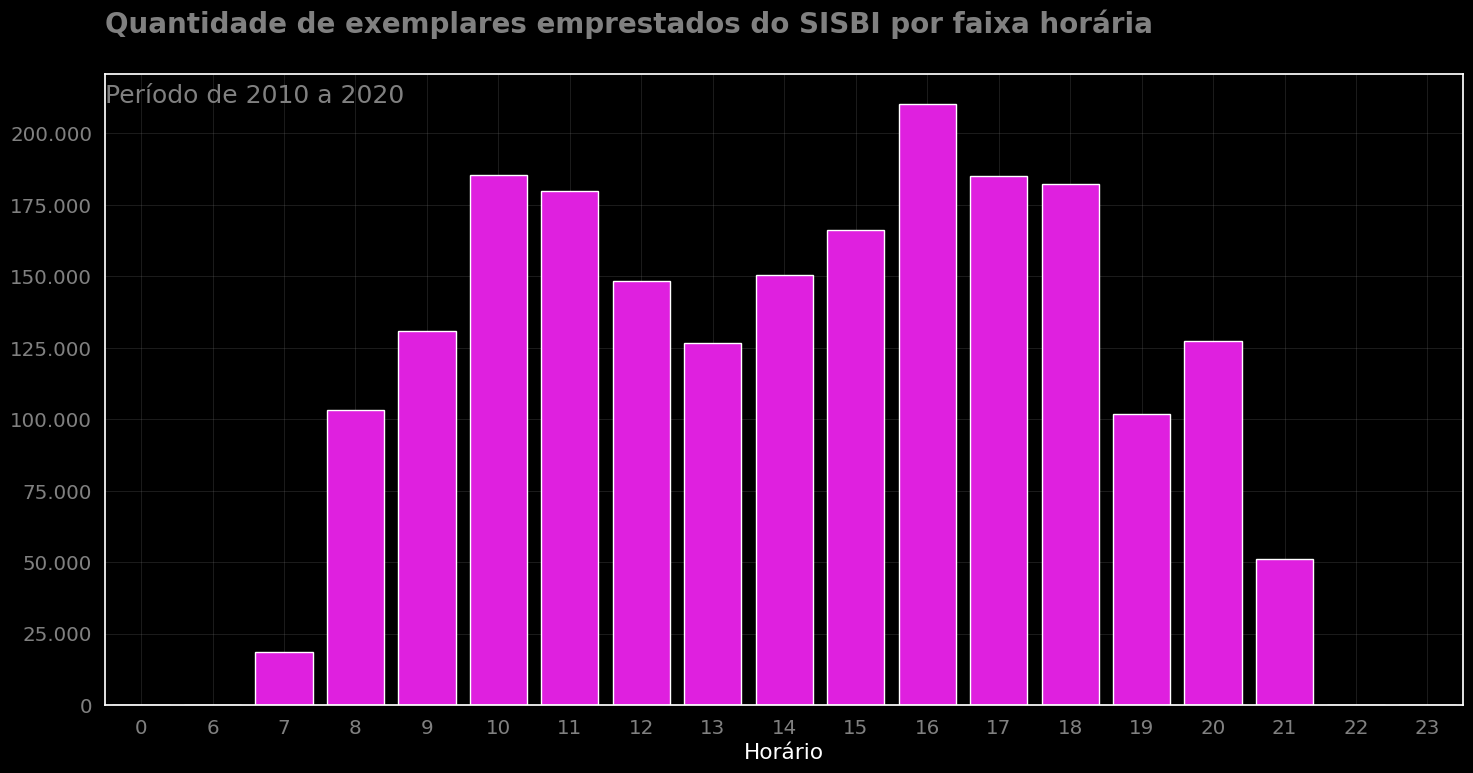

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.style.use('dark_background')

# Gráfico de barras com eixo X correto
plt.figure(figsize=(15,8))
ax = sns.barplot(data=emprestimos_por_hora, x='hora', y='quantidade', color='#FF00FF')

# Ajustes visuais
ax.set(xlabel='Horário', ylabel=None)
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.3)
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',').replace(',','.')))

# Título e anotação
ax.set_title("Quantidade de exemplares emprestados do SISBI por faixa horária\n",
             size=20, loc='left', weight='bold', color='gray')
ax.text(s='Período de 2010 a 2020', x=-0.5, y=emprestimos_por_hora['quantidade'].max() + 500,
        fontsize=18, ha='left', color='gray')

plt.tight_layout()
plt.show()

Através do gráfico é possível identificar que os períodos das 10 h e 16 h são os de maior pico no atendimento de empréstimos.

Períodos do começo da manhã (entre 7h e 9) e da noite (entre 19h e 22) podem ser os melhores horários para que se realizem as demais atividades além do atendimento.